In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import svds
from sklearn.preprocessing import normalize
from numpy.random import choice, rand, randn, permutation

import helperFunctions as hf

In [11]:
# % Follow the synthethic test procedure as outlined in the paper
# % "K-SVD: An Algorithm for Designing Overcomplete Dictionaries for 
# % Sparse Representation." IEEE Trans. on Sig. Proc., Vol. 54, No. 11, 2006.

# TEST 1: RECOVERY VS. DATA SIZE
numSignalsRange = [250, 500, 1000, 2000]
dimSignal = 20
numAtoms  = 50
numTrials = 5
K         = 3   # sparsity level
sigma     = 0.2 # modify for noise level

countMat  = np.zeros((len(numSignalsRange),numTrials))

for nS, numSignals in enumerate(numSignalsRange):
    for nT in range(numTrials):
        print('\rSignal {}/{}, \tTrial {}/{}'.format(nS+1,len(numSignalsRange),nT+1, numTrials), end="")        

        # % generate random matrix D (the dictionary K-SVD will reconstruct)
        D = randn(dimSignal,numAtoms)
        D = normalize(D,norm='l2',axis=0)

        # % generate numSignals of size dimSignal created by linear combination of
        # % 3 dictionary atoms, w/ uniformly distributed i.i.d coefficients and added WGN

        Y = np.zeros((dimSignal,numSignals))
        for k in range(numSignals):
            rInds = choice(numAtoms, K) # 3 random dictionary atoms
            Y[:, k] = D[:,rInds] @ (5*rand(K)) + sigma*randn(dimSignal)

        # % dictionary learning via K-SVD!
        Dhat, Xhat = hf.kSVD(Y,numAtoms,K)

        # % compare generated to true dictionary, check if recovering true atoms
        count = 0
        for k in range(numAtoms):
            for j in range(numAtoms):
                if (1-np.abs(Dhat[:,k].T @ D[:,j]) < 0.01):
                    count = count + 1

        countMat[nS, nT] = count

Signal 4/4, 	Trial 5/5

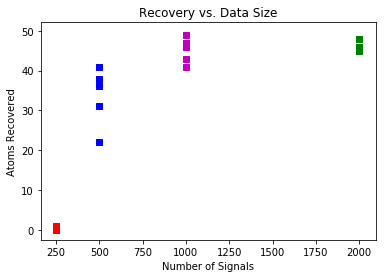

In [12]:
ind_mat = np.repeat(np.array(numSignalsRange).reshape(1,-1), numTrials, axis=0)
colors = ['r','b','m','g']
for ii in range(4):
    plt.scatter(ind_mat[:,ii], countMat[ii,:], marker='s', color=colors[ii]);

plt.xlabel('Number of Signals')
plt.ylabel('Atoms Recovered')
plt.title('Recovery vs. Data Size');

In [19]:
# TEST 2: RECOVERY VS. NOISE LEVEL
sigmaRange = [0.0, 0.125, 0.25, 0.5]
numSignals = 1000
sigmaMat = np.zeros((len(sigmaRange),numTrials))

for nS, sigma in enumerate(sigmaRange):
    for nT in range(numTrials):
        print('\rSignal {}/{}, \tTrial {}/{}'.format(nS+1,len(numSignalsRange),nT+1, numTrials), end="")        
         
        # % generate random matrix D (the dictionary K-SVD will reconstruct)
        D = randn(dimSignal,numAtoms)
        D = normalize(D,norm='l2',axis=0)

        # % generate numSignals of size dimSignal created by linear combination of
        # % 3 dictionary atoms, w/ uniformly distributed i.i.d coefficients and added WGN
        Y = np.zeros((dimSignal,numSignals))
        for k in range(numSignals):
            rInds = choice(numAtoms, K) # 3 random dictionary atoms
            Y[:, k] = D[:,rInds] @ (5*rand(K)) + sigma*randn(dimSignal)

        # % dictionary learning via K-SVD!
        Dhat, Xhat = hf.kSVD(Y,numAtoms,K)

        # % compare generated to true dictionary, check if recovering true atoms
        count = 0
        for k in range(numAtoms):
            for j in range(numAtoms):
                if (1-np.abs(Dhat[:,k].T @ D[:,j]) < 0.01):
                    count = count + 1

        sigmaMat[nS, nT] = count

Signal 4/4, 	Trial 5/5

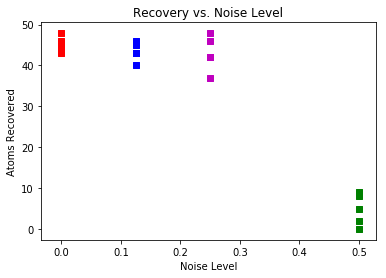

In [20]:
ind_mat = np.repeat(np.array(sigmaRange).reshape(1,-1), numTrials, axis=0)
colors = ['r','b','m','g']
for ii in range(4):
    plt.scatter(ind_mat[:,ii], sigmaMat[ii,:], marker='s', color=colors[ii]);

plt.xlabel('Noise Level')
plt.ylabel('Atoms Recovered')
plt.title('Recovery vs. Noise Level');